In [50]:
import gpflow as gp
import numpy as np
import pandas as pd
from gpflow.utilities import print_summary
import matplotlib.pyplot as plt
import random
import tensorflow as tf

In [32]:
data = pd.read_csv('svm.csv')

In [44]:
random.seed(0)
sample_index = random.sample(range(len(data)),32)

In [45]:
print(sample_index)

[788, 861, 82, 530, 1047, 995, 829, 621, 976, 733, 1194, 447, 1033, 285, 577, 286, 194, 1266, 513, 1090, 1232, 300, 635, 202, 151, 676, 966, 1146, 206, 724, 889, 647]


In [59]:
X = np.array([data.values[i,:3] for i in sample_index])
y = np.array([data.values[i,3] for i in sample_index]).reshape(32,1)
print(y)

[[0.286]
 [0.286]
 [0.261]
 [0.281]
 [0.271]
 [0.279]
 [0.5  ]
 [0.5  ]
 [0.269]
 [0.268]
 [0.265]
 [0.267]
 [0.422]
 [0.281]
 [0.241]
 [0.263]
 [0.478]
 [0.275]
 [0.281]
 [0.268]
 [0.293]
 [0.272]
 [0.265]
 [0.28 ]
 [0.408]
 [0.275]
 [0.266]
 [0.265]
 [0.271]
 [0.255]
 [0.4  ]
 [0.281]]


In [60]:
c = np.linspace(0,1,101)
model_evidence = []
k = gp.kernels.SquaredExponential()
def objective_closure():
    return tf.subtract(tf.constant(3*np.log(32)), tf.math.scalar_mul(2,m1.log_marginal_likelihood()))
for i in c:
    mean = gp.mean_functions.Constant(i)
    m1 = gp.models.GPR(data=(X,y), kernel = k, mean_function=mean, noise_variance=0.001)
    opt = gp.optimizers.Scipy()
    opt_logs = opt.minimize(objective_closure,
                            m1.trainable_variables,
                            options=dict(maxiter=100))
    model_evidence.append(m1.log_marginal_likelihood())

tf.Tensor(-100.99765146500502, shape=(), dtype=float64)


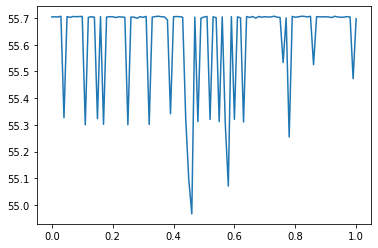

In [61]:
plt.plot(c, model_evidence)
print(objective_closure())

In [66]:
y_log = np.log(y)
kernel_list = [gp.kernels.SquaredExponential(), 
               gp.kernels.Matern12(), 
               gp.kernels.Matern32(),
               gp.kernels.Matern52(),
               gp.kernels.RationalQuadratic(),
               gp.kernels.ArcCosine()]
mean_list = [gp.mean_functions.Zero(),
        gp.mean_functions.Constant()]
model_evidence_search = []
def objective_closure_bic():
    return tf.constant(3*np.log(32))- 2*m1.log_marginal_likelihood()
for i in kernel_list:
    for j in mean_list:
        #print(i)
        m1 = gp.models.GPR(data=(X,y_log), kernel = i, mean_function=j, noise_variance=0.001)
        opt = gp.optimizers.Scipy()
        opt_logs = opt.minimize(objective_closure_bic,
                                m1.trainable_variables,
                                options=dict(maxiter=100))
        model_evidence_search.append(objective_closure_bic())

min_model_index = np.argmax(model_evidence_search)
print("The best model found have kernel: ")
print(kernel_list[int(min_model_index/3)])
print("and mean function: ")
print(mean_list[min_model_index%3])
print("The BIC score for the model is: ")
print(model_evidence_search[min_model_index])

The best model found have kernel: 
and mean function: 
The BIC score for the model is: 
tf.Tensor(48.90056092272807, shape=(), dtype=float64)
